In [2]:
from mplsoccer import FontManager

In [2]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
%run utils_io.py

In [5]:
link_dict = {
    "Lionel Messi": "https://understat.com/player/2097",
    "Karim Benzema": "https://understat.com/player/2370",
    "Gerard Moreno": "https://understat.com/player/2120",
    "Luis Suárez": "https://understat.com/player/2098",
    "Youssef En-Nesyri": "https://understat.com/player/5169",
    "Alexander Isak" : "https://understat.com/player/5232",
}

In [6]:
date_dict = get_date_dict(link_dict)

Scrapping Contents: 100%|██████████| 6/6 [00:47<00:00,  7.88s/it]


In [7]:
month_dict = get_month_dict(date_dict)

month_dict

{9: 'September',
 10: 'October',
 11: 'November',
 12: 'December',
 1: 'January',
 2: 'February',
 3: 'March',
 4: 'April'}

In [8]:
df = get_final_dataframe(date_dict, month_dict)

df

,Lionel Messi,Karim Benzema,Gerard Moreno,Luis Suárez,Youssef En-Nesyri,Alexander Isak
month,,,,,,
9,1.0,0.0,3.0,2.0,0.0,0.0
10,1.0,3.0,3.0,4.0,2.0,1.0
11,4.0,4.0,6.0,5.0,4.0,2.0
12,7.0,8.0,8.0,8.0,5.0,3.0
1,12.0,10.0,10.0,14.0,12.0,6.0
2,19.0,12.0,14.0,16.0,13.0,12.0
3,23.0,17.0,16.0,19.0,15.0,12.0
4,25.0,21.0,20.0,19.0,17.0,13.0


In [9]:
from mplsoccer import add_image
from PIL import Image
from highlight_text import fig_text
import matplotlib.patches as patches

In [10]:
font_normal = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Regular.ttf?raw=true"
))
font_bold = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Bold.ttf?raw=true"
))
font_italic = FontManager((
    "https://github.com/google/fonts/blob/main/apache/arimo/static/Arimo-Italic.ttf?raw=true"
))

In [11]:
font_normal_ = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))

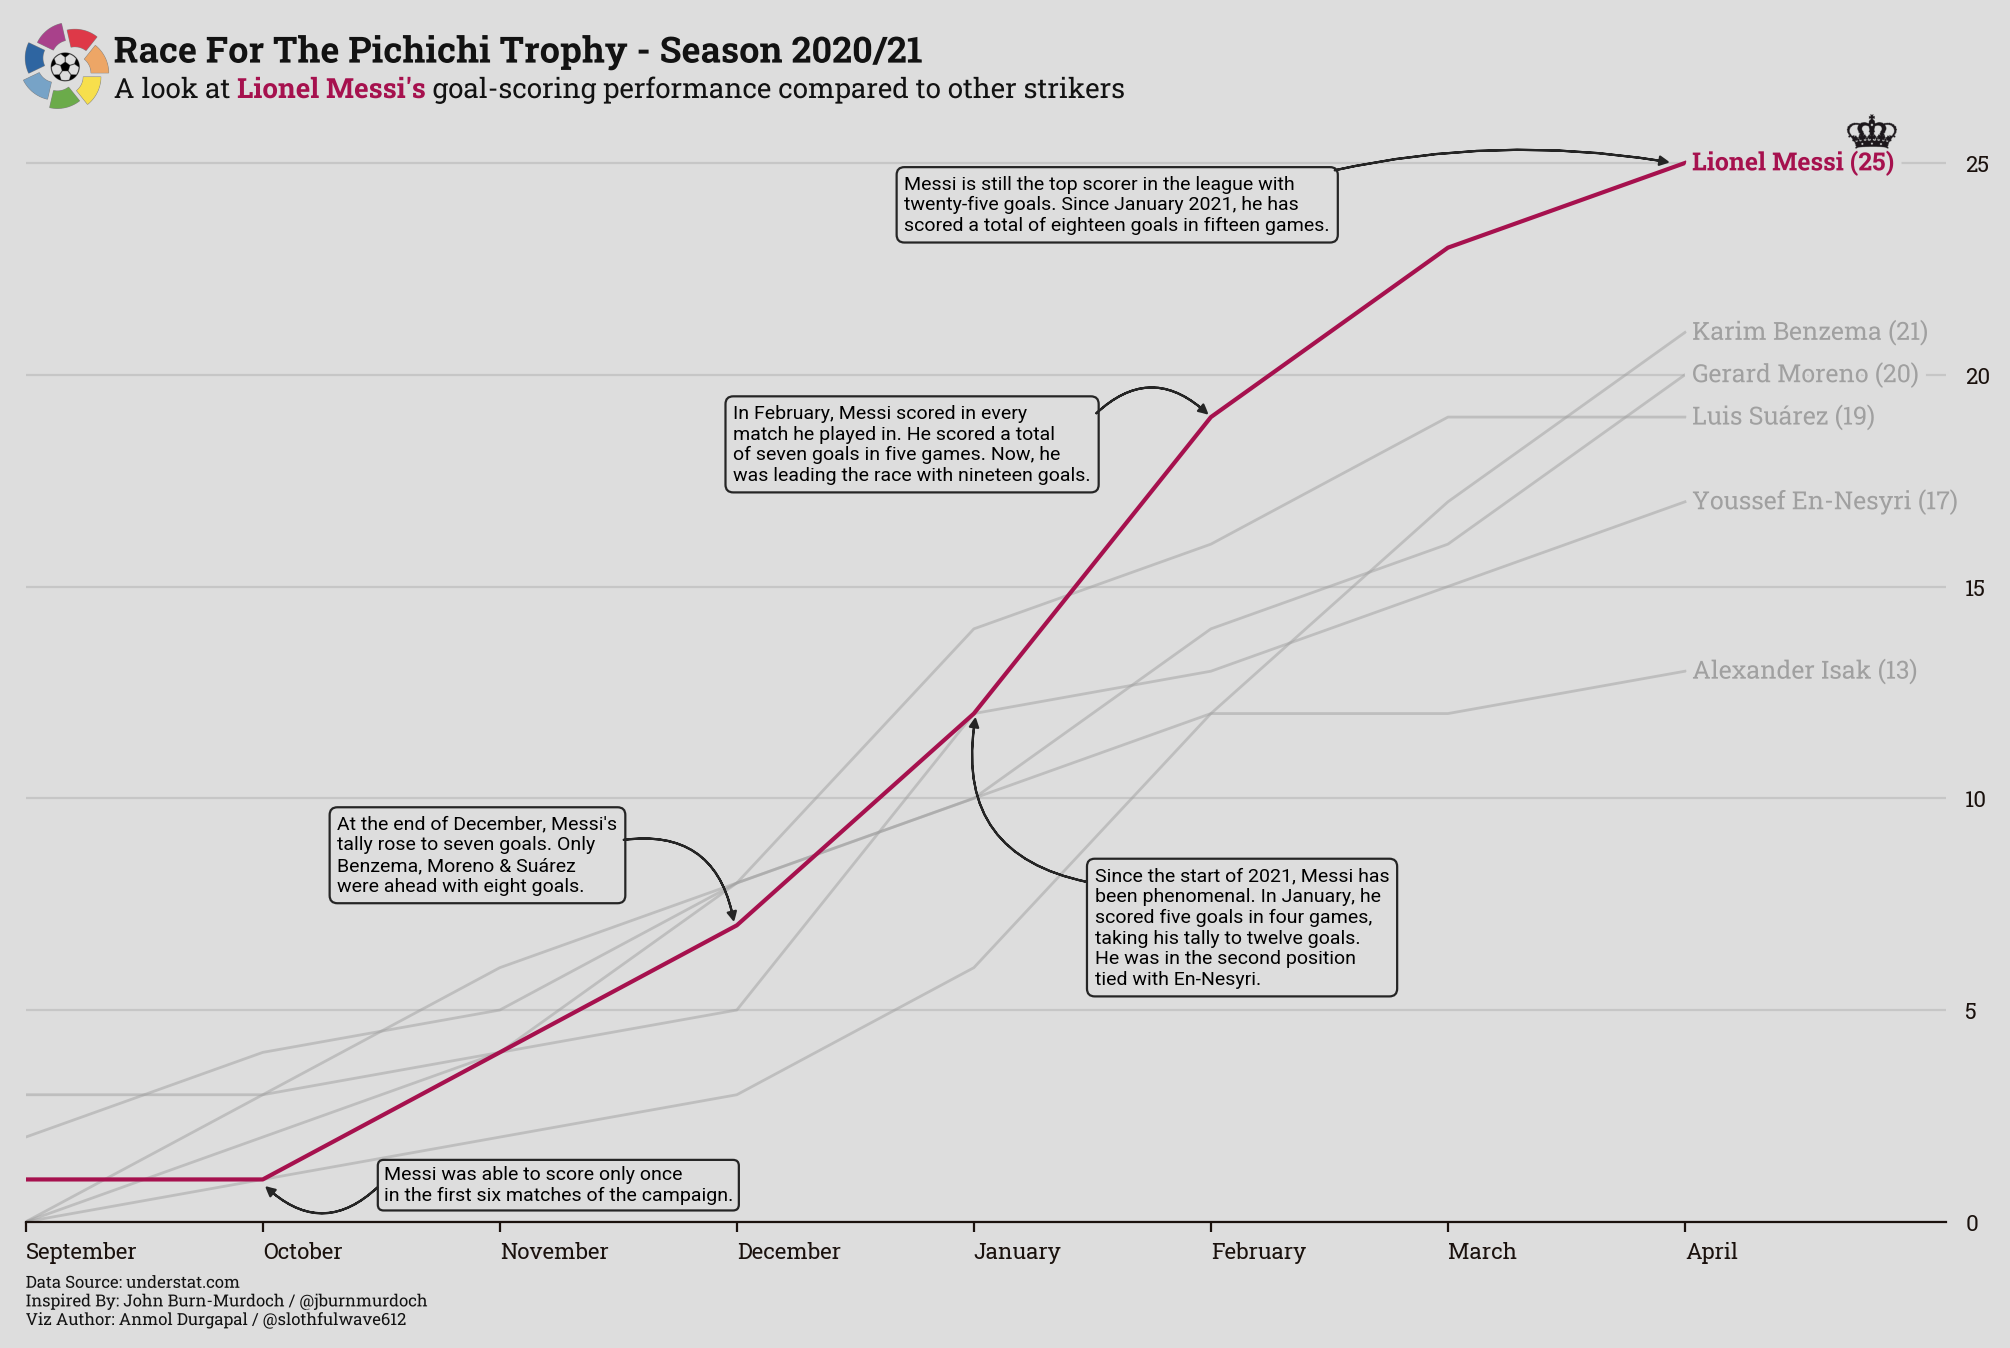

In [167]:
%run utils_viz.py
fig, ax = make_static_viz(
    df, month_dict, background_color="#DDDDDD",
    player_in_focus=["Lionel Messi"],
    color_player=["#A6114E"], color_others="#A0A0A0",
    figsize=(20,12), dpi_plot=200, aspect_ratio=16/9,
    font_normal=font_normal, font_bold=font_bold, 
    width=6, image="crown_2.png", label_color="#1a110d",
)

color = "#121212"
width= 2
background_color="#DDDDDD"

title = "Race For The Pichichi Trophy - Season 2020/21"
sub_title = "A look at <Lionel Messi's> goal-scoring performance compared to other strikers"
credits = "Data Source: understat.com\nInspired By: John Burn-Murdoch / @jburnmurdoch\nViz Author: Anmol Durgapal / @slothfulwave612"

fig.text(
    0.282, 0.758, title,
    color=color, fontproperties=font_bold.prop, size=13,
    path_effects=[
        path_effects.withStroke(linewidth=width, foreground=background_color)
    ],
)
fig_text(
    0.282, 0.752, sub_title, fig=fig,
    highlight_textprops=[{"color": "#A6114E", "fontproperties": font_bold.prop}],
    color=color, fontproperties=font_normal.prop, size=10,
    path_effects=[
        path_effects.withStroke(linewidth=width, foreground=background_color)
    ],
)

fig.text(
    0.26, 0.232, credits,
    color=color, fontproperties=font_normal.prop, size=6,
    path_effects=[
        path_effects.withStroke(linewidth=width, foreground=background_color)
    ],
)

image = Image.open("la_liga_logo.png")
_ = add_image(image, fig, 0.25, 0.736, 0.04, 0.04)


style = "Simple, tail_width=0, head_width=3, head_length=3"
kw = dict(arrowstyle=style, color="#252525", zorder=4, lw=0.8)

# plot arrow
a1 = patches.FancyArrowPatch((2.5,9), (2.99,7), connectionstyle="arc3,rad=-0.5", **kw)
ax.add_patch(a1)

a1 = patches.FancyArrowPatch((4.5, 8), (4.01, 12), connectionstyle="arc3,rad=-0.5", **kw)
ax.add_patch(a1)

a1 = patches.FancyArrowPatch((1.5, 0.9), (1,0.9), connectionstyle="arc3,rad=-0.5", **kw)
ax.add_patch(a1)

a1 = patches.FancyArrowPatch((4.5, 19), (5, 19), connectionstyle="arc3,rad=-0.5", **kw)
ax.add_patch(a1)

a1 = patches.FancyArrowPatch((5.5, 24.8), (6.95, 25), connectionstyle="arc3,rad=-0.1", **kw)
ax.add_patch(a1)

octu = """Messi was able to score only once 
in the first six matches of the campaign."""

decm = """At the end of December, Messi's
tally rose to seven goals. Only 
Benzema, Moreno & Suárez 
were ahead with eight goals."""

jan = """Since the start of 2021, Messi has
been phenomenal. In January, he
scored five goals in four games,
taking his tally to twelve goals. 
He was in the second position
tied with En-Nesyri."""

feb = """In February, Messi scored in every 
match he played in. He scored a total 
of seven goals in five games. Now, he 
was leading the race with nineteen goals."""

apr = """Messi is still the top scorer in the league with
twenty-five goals. Since January 2021, he has
scored a total of eighteen goals in fifteen games."""

ax.text(
    1.51, 0.5, octu, color="#000000", size=7, fontproperties=font_normal_.prop,
    bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.3", lw=0.8), zorder=2
)

ax.text(
    1.315, 7.8, decm, color="#000000", size=7, fontproperties=font_normal_.prop,
    bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
)

ax.text(
    4.51, 5.6, jan, color="#000000", size=7, fontproperties=font_normal_.prop,
    bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
)

ax.text(
    2.985, 17.5, feb, color="#000000", size=7, fontproperties=font_normal_.prop,
    bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
)

ax.text(
    3.707, 23.4, apr, color="#000000", size=7, fontproperties=font_normal_.prop,
    bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
)

plt.show()

In [141]:
# %run utils_viz.py
# fig, ax = make_static_viz(
#     df, month_dict, background_color="#DDDDDD",
#     player_in_focus=["Karim Benzema"],
#     color_player=["#00529F"], color_others="#A0A0A0",
#     figsize=(20,12), dpi_plot=200, aspect_ratio=16/9,
#     font_normal=font_normal, font_bold=font_bold, 
#     width=6, image="crown_2.png", label_color="#1a110d",
# )

# color = "#121212"
# width= 2
# background_color="#DDDDDD"

# title = "Race For The Pichichi Trophy - Season 2020/21"
# sub_title = "A look at <Karim Benzema's> goal-scoring performance compared to other strikers"
# credits = "Data Source: understat.com\nInspired By: John Burn-Murdoch / @jburnmurdoch\nViz Author: Anmol Durgapal / @slothfulwave612"

# fig.text(
#     0.282, 0.758, title,
#     color=color, fontproperties=font_bold.prop, size=13,
#     path_effects=[
#         path_effects.withStroke(linewidth=width, foreground=background_color)
#     ],
# )
# fig_text(
#     0.282, 0.752, sub_title, fig=fig,
#     highlight_textprops=[{"color": "#00529F", "fontproperties": font_bold.prop}],
#     color=color, fontproperties=font_normal.prop, size=10,
#     path_effects=[
#         path_effects.withStroke(linewidth=width, foreground=background_color)
#     ],
# )

# fig.text(
#     0.26, 0.232, credits,
#     color=color, fontproperties=font_normal.prop, size=6,
#     path_effects=[
#         path_effects.withStroke(linewidth=width, foreground=background_color)
#     ],
# )

# image = Image.open("la_liga_logo.png")
# _ = add_image(image, fig, 0.25, 0.736, 0.04, 0.04)


# # style = "Simple, tail_width=0, head_width=3, head_length=3"
# # kw = dict(arrowstyle=style, color="#252525", zorder=4, lw=0.8)

# # # plot arrow
# a1 = patches.FancyArrowPatch((2.6,9.1), (2.99,8), connectionstyle="arc3,rad=-0.5", **kw)
# ax.add_patch(a1)

# # a1 = patches.FancyArrowPatch((4.5, 8), (4.01, 12), connectionstyle="arc3,rad=-0.5", **kw)
# # ax.add_patch(a1)

# # a1 = patches.FancyArrowPatch((1.5, 0.9), (1,0.9), connectionstyle="arc3,rad=-0.5", **kw)
# # ax.add_patch(a1)

# a1 = patches.FancyArrowPatch((5.3, 11), (5, 12), connectionstyle="arc3,rad=-0.5", **kw)
# ax.add_patch(a1)

# a1 = patches.FancyArrowPatch((5.5, 22), (6.95, 21), connectionstyle="arc3,rad=-0.1", **kw)
# ax.add_patch(a1)

# decm = """Till the end of December, Benzema scored
# a total of eight goals in fourteen games.
# He tied with Moreno & Suárez at the top."""

# feb = """At the end of February, Benzema had
# twelve goals in his tally, scoring four goals
# in seven games during January & February."""

# apr = """Since March, Benzema has stepped up with
# his performance. He has scored a total
# of nine goals in seven games. He is now in
# the second position with twenty-one goals."""


# ax.text(
#     1.05, 8.3, decm, color="#000000", size=7, fontproperties=font_normal_.prop,
#     bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
# )

# ax.text(
#     5.31, 10.35, feb, color="#000000", size=7, fontproperties=font_normal_.prop,
#     bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
# )

# ax.text(
#     3.905, 21.5, apr, color="#000000", size=7, fontproperties=font_normal_.prop,
#     bbox=dict(facecolor="none", edgecolor="#252525", boxstyle="round,pad=0.4", lw=0.8), zorder=2
# )

# plt.show()

In [155]:
%run utils_viz.py
fig, ax = make_static_viz(
    df, month_dict, background_color="#DDDDDD",
    player_in_focus=["Alexander Isak"],
    color_player=["#0067B1"], color_others="#A0A0A0",
    figsize=(20,12), dpi_plot=200, aspect_ratio=16/9,
    font_normal=font_normal, font_bold=font_bold, 
    width=6, image="crown_2.png", label_color="#1a110d",
)

color = "#121212"
width= 2
background_color="#DDDDDD"

title = "Race For The Pichichi Trophy - Season 2020/21"
sub_title = "A look at <Alexander Isak's> goal-scoring performance compared to other strikers"
credits = "Data Source: understat.com\nInspired By: John Burn-Murdoch / @jburnmurdoch\nViz Author: Anmol Durgapal / @slothfulwave612"

fig.text(
    0.282, 0.758, title,
    color=color, fontproperties=font_bold.prop, size=13,
    path_effects=[
        path_effects.withStroke(linewidth=width, foreground=background_color)
    ],
)
fig_text(
    0.282, 0.752, sub_title, fig=fig,
    highlight_textprops=[{"color": "#0067B1", "fontproperties": font_bold.prop}],
    color=color, fontproperties=font_normal.prop, size=10,
    path_effects=[
        path_effects.withStroke(linewidth=width, foreground=background_color)
    ],
)

fig.text(
    0.26, 0.232, credits,
    color=color, fontproperties=font_normal.prop, size=6,
    path_effects=[
        path_effects.withStroke(linewidth=width, foreground=background_color)
    ],
)

image = Image.open("la_liga_logo.png")
_ = add_image(image, fig, 0.25, 0.736, 0.04, 0.04)

plt.show()

In [168]:
fig.savefig("plots/01_messi.jpg", dpi=700, bbox_inches="tight", pad_inches=0.05)